In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

In [2]:
from sklearn.datasets import make_blobs

In [3]:
X, y = make_blobs(n_samples=500, centers=4, random_state=8, cluster_std=2.4)

In [5]:
y

array([1, 2, 2, 1, 0, 3, 2, 2, 2, 0, 1, 2, 0, 0, 2, 2, 0, 3, 3, 2, 0, 3, 3,
       2, 3, 3, 3, 1, 2, 0, 2, 3, 3, 2, 1, 0, 3, 0, 2, 1, 2, 1, 0, 3, 1, 3,
       0, 0, 0, 2, 1, 3, 1, 0, 0, 3, 2, 0, 2, 3, 0, 0, 0, 2, 0, 0, 1, 0, 2,
       0, 1, 1, 2, 1, 0, 2, 1, 2, 0, 1, 3, 2, 1, 2, 2, 2, 0, 2, 1, 0, 0, 3,
       1, 2, 0, 1, 3, 2, 1, 0, 2, 1, 2, 0, 0, 2, 1, 3, 0, 3, 0, 3, 0, 1, 0,
       0, 0, 1, 0, 3, 0, 0, 0, 0, 1, 0, 3, 2, 0, 1, 3, 1, 2, 1, 3, 1, 1, 3,
       3, 3, 0, 1, 2, 0, 1, 0, 2, 1, 3, 2, 1, 2, 3, 3, 2, 0, 3, 2, 3, 3, 1,
       0, 2, 3, 2, 0, 0, 3, 0, 1, 3, 2, 0, 0, 0, 2, 3, 3, 0, 1, 2, 3, 2, 0,
       1, 1, 1, 1, 0, 1, 3, 2, 2, 1, 2, 1, 3, 3, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       1, 1, 1, 2, 0, 3, 3, 3, 1, 3, 0, 3, 1, 0, 3, 1, 0, 2, 0, 1, 2, 3, 0,
       1, 3, 2, 0, 1, 3, 3, 1, 3, 2, 1, 2, 0, 1, 1, 1, 1, 1, 0, 2, 1, 3, 2,
       1, 2, 2, 1, 0, 1, 2, 3, 3, 0, 2, 2, 0, 1, 0, 2, 3, 3, 0, 0, 3, 1, 1,
       0, 3, 3, 0, 1, 2, 0, 0, 0, 2, 3, 2, 1, 0, 3, 3, 2, 3, 1, 0, 0, 3, 3,
       0, 3,

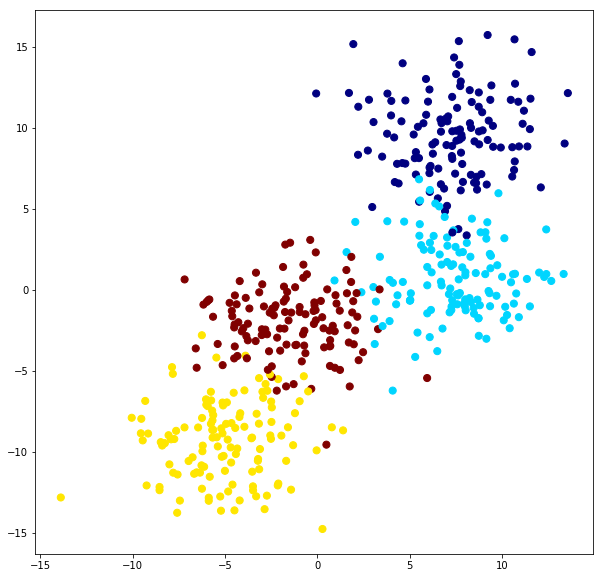

In [7]:
plt.figure(figsize=(10,10))
plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap='jet')

In [8]:
from sklearn.tree import DecisionTreeClassifier

In [11]:
def visualize_tree(classifier, X, y, boundaries=True,xlim=None, ylim=None):
    '''
    決定木の可視化をします。
    INPUTS: 分類モデル, X, y, optional x/y limits.
    OUTPUTS: Meshgridを使った決定木の可視化
    '''
    # fitを使ったモデルの構築
    classifier.fit(X, y)
    
    # 軸を自動調整
    if xlim is None:
        xlim = (X[:, 0].min() - 0.1, X[:, 0].max() + 0.1)
    if ylim is None:
        ylim = (X[:, 1].min() - 0.1, X[:, 1].max() + 0.1)

    x_min, x_max = xlim
    y_min, y_max = ylim
    
    
    # meshgridをつくります。
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    
    # 分類器の予測をZとして保存
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])

    # meshgridを使って、整形します。
    Z = Z.reshape(xx.shape)
    
    # 分類ごとに色を付けます。
    plt.figure(figsize=(10,10))
    plt.pcolormesh(xx, yy, Z, alpha=0.2, cmap='jet')
    
    # 訓練データも描画します。
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='jet')
    
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)        
    
    def plot_boundaries(i, xlim, ylim):
        '''
        境界線を描き込みます。
        '''
        if i < 0:
            return

        tree = classifier.tree_
        
        # 境界を描画するために、再帰的に呼び出します。
        if tree.feature[i] == 0:
            plt.plot([tree.threshold[i], tree.threshold[i]], ylim, '-k')
            plot_boundaries(tree.children_left[i],
                            [xlim[0], tree.threshold[i]], ylim)
            plot_boundaries(tree.children_right[i],
                            [tree.threshold[i], xlim[1]], ylim)
        
        elif tree.feature[i] == 1:
            plt.plot(xlim, [tree.threshold[i], tree.threshold[i]], '-k')
            plot_boundaries(tree.children_left[i], xlim,
                            [ylim[0], tree.threshold[i]])
            plot_boundaries(tree.children_right[i], xlim,
                            [tree.threshold[i], ylim[1]])
    
    if boundaries:
        plot_boundaries(0, plt.xlim(), plt.ylim())


In [14]:
clf = DecisionTreeClassifier(max_depth=2, random_state=0)

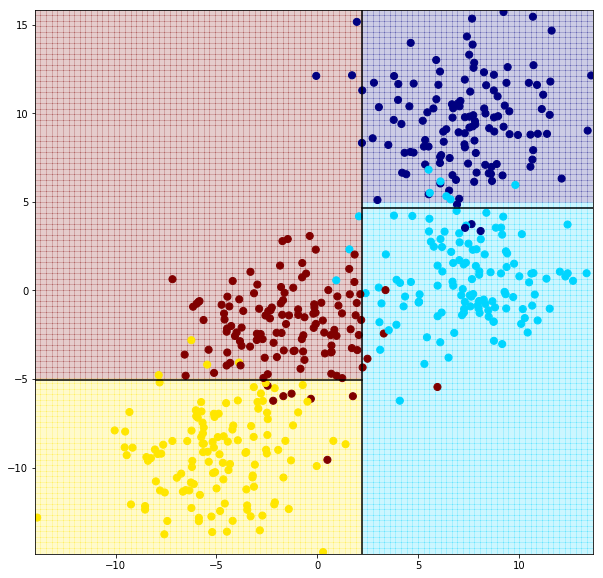

In [16]:
visualize_tree(clf, X, y)

In [18]:
clf = DecisionTreeClassifier(max_depth=4, random_state=0)

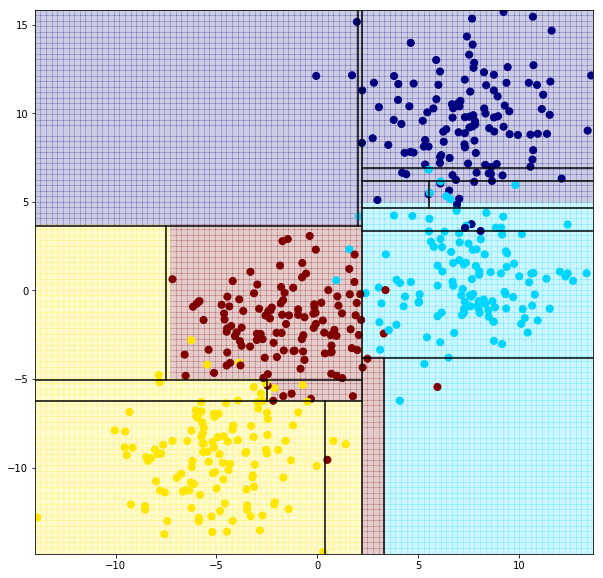

In [19]:
visualize_tree(clf, X, y)

In [20]:
from sklearn.ensemble import RandomForestClassifier

In [27]:
clf = RandomForestClassifier(n_estimators=100, random_state=0)

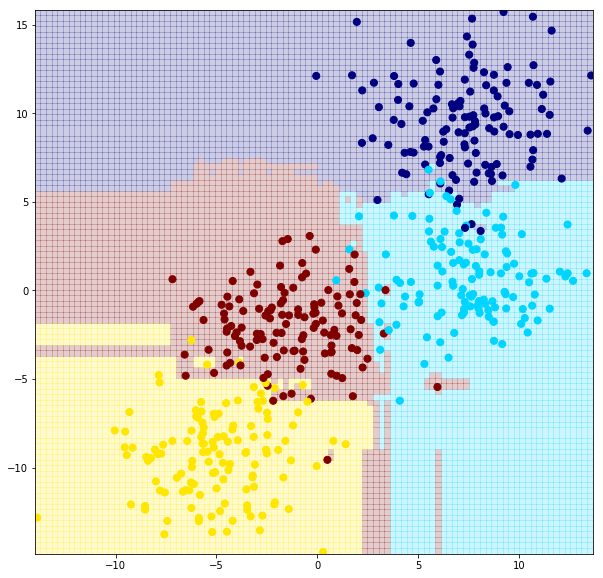

In [28]:
visualize_tree(clf, X, y, boundaries=False)

In [40]:
from sklearn.ensemble import RandomForestRegressor

In [41]:
x = 10 * np.random.rand(100)

def sin_model(x, sigma=0.2):
    '''
    大きな波＋小さな波＋ノイズからなるダミーデータです。
    '''
   
    noise = sigma * np.random.randn(len(x))

    # 大きな波 + 小さな波
    return np.sin(5 * x) + np.sin(0.5 * x) + noise

In [42]:
y = sin_model(x)

In [43]:
y

array([-0.9240111 ,  0.71155987,  0.72873753,  1.60703225,  1.06135801,
        1.66422168, -0.15903229, -1.1406478 ,  0.38662264, -0.93316238,
       -0.67516714, -0.16053332, -1.62454787,  1.83947579,  0.77811077,
       -1.39093046, -0.12119565,  1.04115005, -0.56874755, -0.61389988,
        1.81989619,  0.20644995,  0.95866484, -0.29464752, -1.99797007,
        0.59711106, -0.41089769,  0.76212624,  0.24042658, -1.70815071,
        1.17224806, -2.03685831,  1.51923208, -0.71734637,  1.72828652,
        1.34642491,  2.05329983, -1.58272365,  0.63477999, -0.2876673 ,
        1.30759216, -0.18588579,  0.94563014,  0.21845256,  0.35025792,
       -0.7258593 ,  0.92337308, -0.21814007,  1.93228873, -1.99007902,
        0.36410069,  0.54354353,  1.15765777, -2.03859483, -1.90688732,
        1.07926555, -0.08637368,  1.66394331, -1.67441009, -0.59038952,
        0.74009554, -1.94930344,  0.08251821,  0.09836784, -1.63771001,
        0.77315584,  1.3800857 , -1.39676021,  0.43081331, -0.56

<Container object of 3 artists>

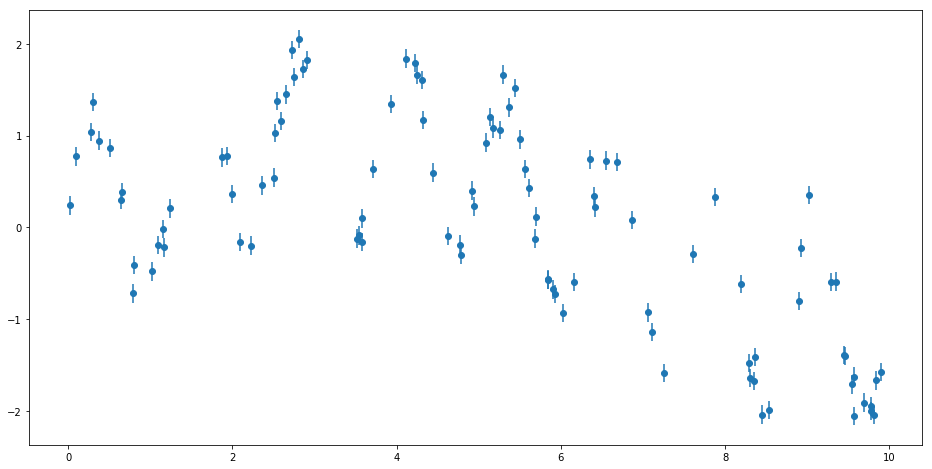

In [44]:
plt.figure(figsize=(16,8))
plt.errorbar(x, y, 0.1, fmt='o')

In [46]:
xfit = np.linspace(0, 10, 1000)

In [49]:
rfr = RandomForestRegressor(100)

In [50]:
rfr.fit(x[:, None], y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [52]:
yfit = rfr.predict(xfit[:,None])

In [53]:
yfit

array([ 0.44547814,  0.44547814,  0.44547814,  0.44547814,  0.44547814,
        0.44547814,  0.6905336 ,  0.6905336 ,  0.6905336 ,  0.6905336 ,
        0.6905336 ,  0.6905336 ,  0.6905336 ,  0.6905336 ,  0.6905336 ,
        0.81864936,  0.84113542,  0.84113542,  0.84113542,  0.94297322,
        1.08130777,  1.08130777,  1.08130777,  1.09338097,  1.09338097,
        1.09338097,  1.09338097,  1.09965608,  1.09965608,  1.23555947,
        1.23745511,  1.23745511,  1.23745511,  1.22885832,  1.05702756,
        1.05702756,  1.05702756,  1.05702756,  1.05702756,  1.05702756,
        1.04143844,  0.96195173,  0.96195173,  0.96195173,  0.9300978 ,
        0.9300978 ,  0.9300978 ,  0.87353172,  0.84418851,  0.84418851,
        0.84418851,  0.73436297,  0.7287729 ,  0.7287729 ,  0.7287729 ,
        0.68713138,  0.68713138,  0.68713138,  0.40296135,  0.3403904 ,
        0.3403904 ,  0.3403904 ,  0.3403904 ,  0.3403904 ,  0.3403904 ,
        0.30376849,  0.29098014,  0.29098014,  0.29098014,  0.29

In [54]:
ytrue = sin_model(xfit, 0)

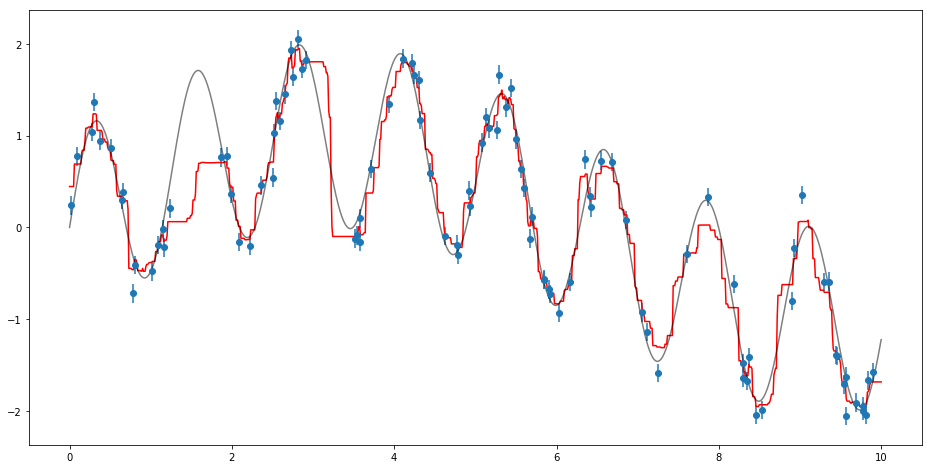

In [55]:
plt.figure(figsize=(16,8))
plt.errorbar(x,y,0.1,fmt='o')
plt.plot(xfit, yfit, '-r')
plt.plot(xfit, ytrue, '-k', alpha=0.5)